<a href="https://colab.research.google.com/github/mattheweisenberg6/MAT421/blob/main/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.2 - Continuity and Differentiation**

Limits are fundamental in defining continuity, derivatives, and integrals. While limits can be computed manually, we can use Python to calculate them as well.

In [1]:
# Using the sympy library to compute limits of different functions
from sympy import *

z = symbols('z')

# Example 1: Limit of cos(z)/z as z approaches 0
func1 = cos(z) / z
limit_result = limit(func1, z, 0)
print(f"Limit as {func1} approaches 0: {limit_result}")

# Example 2: Limit of sin(z)/z as z approaches 0
func2 = sin(z) / z
limit_result = limit(func2, z, 0)
print(f"Limit as {func2} approaches 0: {limit_result}")

# Example 3: Limit of sin(6z)/z as z approaches 0
func3 = sin(6 * z) / z
limit_result = limit(func3, z, 0)
print(f"Limit as {func3} approaches 0: {limit_result}")



Limit as cos(z)/z approaches 0: oo
Limit as sin(z)/z approaches 0: 1
Limit as sin(6*z)/z approaches 0: 6



A derivative measures how a function changes as its input changes. Formally, given a function f : D → R where D ⊆ R and let x0 ∈ D be an interior point of D. The derivative of f at x0 is f′(x0) = df(x0)/dx = lim h→0 f(x0 + h) f (x0)/h such that the limit exists. We can compute derivatives programmatically using Python.

In [5]:
# Using the sympy library to compute derivatives
from sympy import *

a, b = symbols('a b')

# Example 1: Derivative of (sin(a)^2)/cos(a)
expr1 = (sin(a)**2) / cos(a)
print(f"Derivative of {expr1} with respect to a: {expr1.diff(a)}")

# Example 2: Derivative of sin(a)
expr2 = sin(a)
print(f"Derivative of {expr2} with respect to a: {expr2.diff(a)}")

# Example 3: Derivative of a^3
expr3 = a**3
print(f"Derivative of {expr3} with respect to a: {expr3.diff(a)}")

# Example 4: Derivative of a^2 + 2b + b^3 with respect to a
expr4 = a**2 + 2 * b + b**3
deriv_expr4 = Derivative(expr4, a)
print(f"Derivative of {expr4} with respect to a: {deriv_expr4}")
print(f"Value of the derivative: {deriv_expr4.doit()}")




Derivative of sin(a)**2/cos(a) with respect to a: sin(a)**3/cos(a)**2 + 2*sin(a)
Derivative of sin(a) with respect to a: cos(a)
Derivative of a**3 with respect to a: 3*a**2
Derivative of a**2 + b**3 + 2*b with respect to a: Derivative(a**2 + b**3 + 2*b, a)
Value of the derivative: 2*a


Rolle’s theorem states that if a function
f : [a, b] → R is a continuous function and we assume that its derivative exists on (a, b). If f (a) = f (b), then there is a < c < b such that f ′(c) = 0.
This theorem connects a function's critical points to its derivative behavior.

The Mean Value Theorem generalizes Rolle’s theorem: Let
f : [a, b] → R be a continuous function and assume that its derivative exists on (a, b). Then there is a < c < b such that f (b) = f (a) + (b − a) f ′(c).
In essence, this theorem states that at some point within an interval, the instantaneous rate of change (derivative) matches the average rate of change over that interval.

Taylor’s theorem is a powerful extension of the Mean Value Theorem. It provides polynomial approximations of a function around a point and expresses a function as an infinite sum of terms derived from its derivatives. This concept is widely used in numerical analysis and approximations.

Python can be used to demonstrate Taylor series approximations:



Max Error: 0.0090455999657022


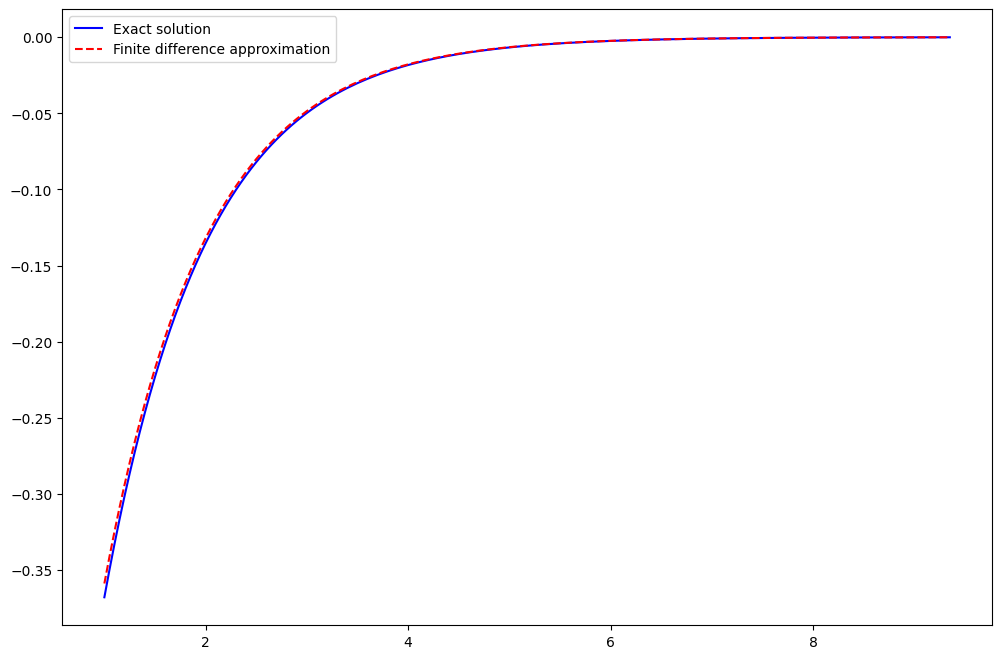

In [7]:

import numpy as np
import matplotlib.pyplot as plt

step_size = 0.05
x_vals = np.arange(1, 3*np.pi, step_size)  # Define grid from 1 to 3π
y_vals = np.exp(-x_vals)                   # Compute function values for e^(-x)

# Compute forward difference approximation
forward_diff = np.diff(y_vals) / step_size
x_adj = x_vals[:-1]               # Adjust grid for difference computation
exact_derivative = -np.exp(-x_adj)  # Compute exact derivative of e^(-x)

# Compute maximum error between numerical derivative and exact solution
max_error = max(abs(exact_derivative - forward_diff))
print(f"Max Error: {max_error}")

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(x_adj, exact_derivative, label='Exact solution', color='blue')
plt.plot(x_adj, forward_diff, '--', label='Finite difference approximation', color='red')
plt.legend()
plt.show()


**3.3 Unconstrained Optimization**

Global Minimizer
A function
 f : Rd → R. The point x∗ ∈ Rd is a global minimizer of f over Rd if f(x) ≥ f(x∗), ∀x ∈ Rd.

This means that there is the point where the function attains its lowest possible value across its entire domain.

Local Minimizer
A function
Let f : Rd → R. The point x∗ ∈ Rd is a local minimizer of f over Rd if there is δ > 0 such that f(x) ≥ f(x∗), ∀x ∈ Bδ(x∗) \ {x∗}.
This means that there is a point with the lowest point within a small neighborhood, but it may not be the absolute lowest value of the function.

Finding Local and Global Minimizers with Python
We can use numerical optimization to locate the minimizers of a function. Below is an implementation using Python.

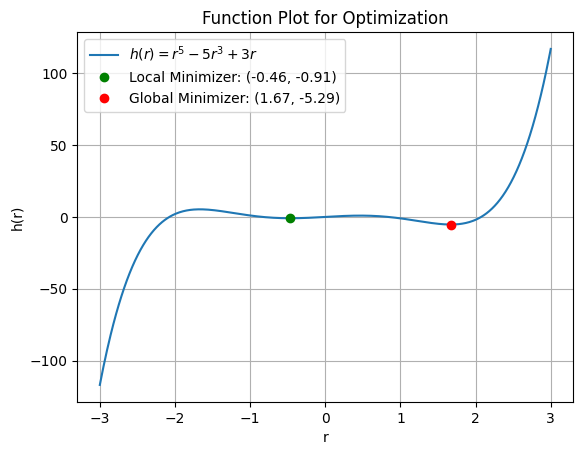

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the function
def h(r):
    return r**5 - 5*r**3 + 3*r

# Generate r values for plotting
r_values = np.linspace(-3, 3, 500)
h_values = h(r_values)

# Plot the function
plt.plot(r_values, h_values, label=r'$h(r) = r^5 - 5r^3 + 3r$')
plt.xlabel('r')
plt.ylabel('h(r)')
plt.title('Function Plot for Optimization')
plt.grid(True)
plt.legend()

# Find local minimum (starting from r=-1)
result_local = minimize(h, x0=-1)
r_local_min = result_local.x
h_local_min = result_local.fun

# Plot local minimum
plt.plot(r_local_min, h_local_min, 'go', label=f'Local Minimizer: ({r_local_min[0]:.2f}, {h_local_min:.2f})')

# Find global minimum (starting from r=2)
result_global = minimize(h, x0=2)
r_global_min = result_global.x
h_global_min = result_global.fun

# Plot global minimum
plt.plot(r_global_min, h_global_min, 'ro', label=f'Global Minimizer: ({r_global_min[0]:.2f}, {h_global_min:.2f})')

plt.legend()
plt.show()
